In [147]:
# Some useful imports
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def d(x, sigma, K, r, T):
    d1 = np.log(x/K) + (r+sigma**2/2)*T
    d1 = d1/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return (d1, d2)

def european_put(x, sigma, K, r, T):
    (d1, d2) = d(x, sigma, K, r, T)
    return K*np.exp(-r*T)*norm.cdf(-d2)-x*norm.cdf(-d1)

def delta_european_put(x, sigma, K, r, T):
    (d1, _) = d(x, sigma, K, r, T)
    return -norm.cdf(-d1)

def f(x, sigma, K, r, alpha):
    num = np.abs(alpha) * (K-european_put(x, sigma, K, r, T))
    den = 1 + delta_european_put(x, sigma, K, r, T) + np.abs(alpha)
    return num/den

def alpha(interest_rate, volatility, T):
    sigma_square = volatility**2
    alpha = 0.5 + interest_rate / sigma_square
    alpha = -alpha - np.sqrt(alpha**2 + 2 * (1 + interest_rate) * sigma_square)
    alpha /= sigma_square
    return alpha

def lam(x_star, alpha, sigma, K, r):
    lam = K - x_star - european_put(x_star, sigma, K, r, T)
    lam = lam / (x_star)**alpha
    return lam

def dichotomy(g, a, b, eps):
    middle = (a+b)/2
    if b-a < eps:
        return middle
    else:
        if g(a)*g(middle)<0:
            return dichotomy(g, a, middle, eps)
        else:
            return dichotomy(g, middle, b, eps)

def get_x_star(sigma, K, r, alpha, eps):
    def g(x):
        return f(x, sigma, K, r, alpha) - x
    x_star = dichotomy(g, eps, K, eps)
    return x_star

def american_put(x, sigma, K, r, eps, T):
    a = alpha(r, sigma, T)
    x_star = get_x_star(sigma, K, r, a, eps)
    lamb = lam(x_star, a, sigma, K, r)
    
    if x >= x_star:
        return lamb * (x ** a) + european_put(x, sigma, K, r, T)
    else:
        return np.max(K-x, 0)

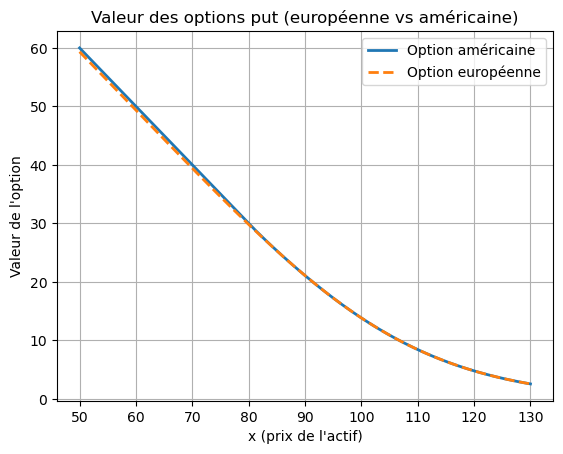

In [149]:
# Paramètres
sigma = 0.2
mu = 0.08
r = 0.006
K = 110
T = 1
eps = 10e-5

# Tracé
x_vals = np.linspace(50, 130, 500)
y_american = [american_put(x, sigma, K, r, eps, T) for x in x_vals]
y_european = [european_put(x, sigma, K, r, T) for x in x_vals]

# Affichage
plt.plot(x_vals, y_american, label="Option américaine", linewidth=2)
plt.plot(x_vals, y_european, label="Option européenne", linestyle='--', linewidth=2)
plt.xlabel("x (prix de l'actif)")
plt.ylabel("Valeur de l'option")
plt.title("Valeur des options put (européenne vs américaine)")
plt.legend()
plt.grid(True)
plt.show()


In [138]:
print(american_put(100, sigma, K, r, eps, T))

13.822983224025762
